<a href="https://colab.research.google.com/github/Gabomatius/MD_Anime/blob/main/Analisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de Base de Datos de Anime del año 2020**
Este es un análisis desarrollado para la base de datos de Anime extraída de <a href="https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020">Kaggle</a>. Se tiene planeado dos objetivos con este dataset. El primero es desarrollar un modelo de recomendación basado en las características que se tienen, usando métodos de agrupación. El segundo, determinar qué probabilidad puede tener un anime de gustarle a un usuario, dado los gusto de este, por lo que para este caso se podría usar métodos de predicción. 

Analizando la data con la que se cuente, se tiene una base de datos de 17.562 animes, con las siguientes variables:
1. **MAL_ID**: Identificador para cada uno de los animes.
2. **Name:** Nombre completo del anime.
3. **Score**: Calificación promedio para el anime.
4. **Genres**: Lista separada por comas, donde presenta los géneros en los cuales está clasificado el anime.
5. **English name**: Nombre completo en inglés.
6. **Japanese name**: Nombre completo en Japones.
7. **Type**: El tipo del anime, si es de TV, película, entre otros.
8. **Episodes**: Número de capitulos.
9. **Aired**: Fecha de salida al aire.
10. **Premiered**: Estación en la cual fue estrenada el anime (Por ejemplo Primavera de 1998).
11. **Producers**: Lista de productores separadas por coma.
12. **Licensors**: Lista de licenciantes separadas por coma.
13. **Studios**: Lista de estudios separada por coma.
14. **Source**: Fuente de la cual es sacado el anime.
15. **Duration**: Duración promedio por episodio.
16. **Rating**: Rango de edad en la cual el anime está clasificado.
17. **Ranked**: Posición del Anime basada en el Score.
18. **Popularity**: Posición basada en el número de usuarios que vieron el anime.
19. **Members**: Número de miembros de la comunidad que pertenecen al grupo del anime.
20. **Favorites**: Número de miembros que tienen el anime como favorito.
21. **Watching**: Número de usuarios que están viendo el anime.
22. **Completed**: Número de ususarios que terminaron el anime.
23. **On-Hold**: Número de ususarios que tienen pausado de ver el anime.
24. **Dropped**: Número de usuarios que eliminaron el anime.
25. **Plan to Watch**: Número de usuarios que tienen pendiente de ver el anime.
26. **Score-10**: Número de usuarios que calificaron el anime con 10.
27. **Score-9**: Número de usuarios que calificaron el anime con 9.
28. **Score-8**: Número de usuarios que calificaron el anime con 8.
29. **Score-7**: Número de usuarios que calificaron el anime con 7.
30. **Score-6**: Número de usuarios que calificaron el anime con 6.
31. **Score-5**: Número de usuarios que calificaron el anime con 5.
32. **Score-4**: Número de usuarios que calificaron el anime con 4.
33. **Score-3**: Número de usuarios que calificaron el anime con 3.
34. **Score-2**: Número de usuarios que calificaron el anime con 2.
35. **Score-1**: Número de usuarios que calificaron el anime con 1.

# **Análisis Descriptivo y Limpieza de Datos**
Para desarrollar el análisis se utilizará Python. Primero se revisará la carga de los datos, y a continuación se procederá a revisar las variables. Para esto se utilizarán diferentes librerías. Posteriormente, se realizará la limpieza de datos para poder desarrollar el análisis descriptivo.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import trim_mean
from numpy import mean, absolute
import re
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA

Para cargar los datos a trabajar, lo primero es conectar Google Colab con Google Drive donde se tiene la información.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ya con la conexión de Google Colab con Google Drive, se procede a cargar la base de datos con la cual se trabajará.

In [ ]:
data=pd.read_csv("/content/drive/Shareddrives/Mineria de datos/anime.csv")
data.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


Las variables de nombre serán eliminadas ya que estas son variables cualitativas que no son de aporte para el análisis.

In [ ]:
data = data.drop(["Name", "English name", "Japanese name"], axis = 1)

Ahora procederemos a revisar qué tipo de variables se cuentan, para determinar si se encuentran de manera correcta cargadas.

In [ ]:
data.dtypes

MAL_ID            int64
Score            object
Genres           object
Type             object
Episodes         object
Aired            object
Premiered        object
Producers        object
Licensors        object
Studios          object
Source           object
Duration         object
Rating           object
Ranked           object
Popularity        int64
Members           int64
Favorites         int64
Watching          int64
Completed         int64
On-Hold           int64
Dropped           int64
Plan to Watch     int64
Score-10         object
Score-9          object
Score-8          object
Score-7          object
Score-6          object
Score-5          object
Score-4          object
Score-3          object
Score-2          object
Score-1          object
dtype: object

Como se evidencia usando el método *dtypes* de pandas, se observa que algunas variables, como los son los Scores están del tipo objeto pero no del tipo numérico, por lo que se procede a revisar qué sucede con estas variables. Se utilizó la librería **re** con la función **match** para encontrar si hay registros que no tengan valores numéricos.

In [ ]:
data[data['Score'].apply(lambda x: True if (re.match("\D*", x).group(0) != '') else False)].head()

,MAL_ID,Score,Genres,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
1404,1547,Unknown,"Comedy, School, Slice of Life, Supernatural",TV,96,"Aug 29, 1965 to Jun 28, 1967",Summer 1965,Unknown,Unknown,Shin-Ei Animation,...,8.0,5.0,6.0,20.0,28.0,31.0,6.0,6.0,2.0,10.0
1504,1656,Unknown,"Comedy, Kids",TV,24,"Jul 4, 2004 to Jan 9, 2005",Summer 2004,Unknown,Unknown,Unknown,...,7.0,2.0,6.0,13.0,17.0,22.0,15.0,12.0,7.0,10.0
1578,1739,Unknown,Kids,TV,80,"Apr 5, 2006 to Mar 14, 2007",Spring 2006,Unknown,Unknown,Three-d,...,6.0,4.0,23.0,28.0,18.0,17.0,1.0,3.0,Unknown,8.0
1699,1863,Unknown,"Adventure, Fantasy, Historical",TV,26,"Sep 16, 2006 to Mar 24, 2007",Fall 2006,NHK-BS2,Unknown,OLM,...,3.0,1.0,2.0,9.0,5.0,9.0,3.0,1.0,2.0,3.0
1893,2073,Unknown,"Horror, Shoujo",OVA,6,"Sep 14, 1990 to Mar 8, 1991",Unknown,Unknown,Unknown,Unknown,...,10.0,3.0,14.0,26.0,27.0,19.0,10.0,3.0,1.0,4.0


Se encuentra que hay registros que presentan "Unknown" como valores desconocidos, por lo que se hará es cambiar estos valores por *np.NaN* para eliminar estos valores y poder convertir las variables que son numéricas en numéricas.

In [ ]:
for i in data.columns[data.dtypes == "object"]:
  data[i] = data[i].apply(lambda x: np.NaN if x == "Unknown" else x)

Ya que se se eliminaron los "Unknown" por **np.NaN**, se transformarán las variables de **Score** a numéricas y aquellas que aparecen como enteros, se pasarán a valores reales.

In [ ]:
for i in range(len(data.columns)):
  if (("Score" in data.columns[i])|(data.dtypes[i] == "int64")):
    data = data.astype({data.columns[i]:float})

data[['Episodes']] = data[['Episodes']].astype({'Episodes':float})
data.dtypes

MAL_ID           float64
Score            float64
Genres            object
Type              object
Episodes         float64
Aired             object
Premiered         object
Producers         object
Licensors         object
Studios           object
Source            object
Duration          object
Rating            object
Ranked            object
Popularity       float64
Members          float64
Favorites        float64
Watching         float64
Completed        float64
On-Hold          float64
Dropped          float64
Plan to Watch    float64
Score-10         float64
Score-9          float64
Score-8          float64
Score-7          float64
Score-6          float64
Score-5          float64
Score-4          float64
Score-3          float64
Score-2          float64
Score-1          float64
dtype: object

Ya con las variables cargadas de manera correcta, entramos a revisar las variables categóricas con las cuales contamos. Primero se determinará los valores únicos para las variables de Generos, Tipo, Productores, Licenciadores y Estudios.

In [ ]:
Genres = []
for i in range(len(data['Genres'])):
  if (not(pd.isna(data['Genres'][i]))):
    for j in data['Genres'][i].split(", "):
      Genres.append(j)

Genres = np.unique(np.array(Genres)).tolist()
print("Se encuentra que hay un total de {} generos de Anime".format(len(Genres)))

for i in range(len(Genres)):
  Genres[i] = 'Genre ' + Genres[i]

Se encuentra que hay un total de 43 generos de Anime


Como vemos, se encuentra un total de 43 generos distintos de Anime. Ya que un Anime puede ser categorizado en más de un genero, se harán dos bases de datos, una en donde se creará una variable por cada genero, y se colocará 1 si el anime está categorizado en la categoría, y 0 si no, y en otra, se repetirán los registros pero en este caso por cada registro, se tendrá un valor distinto por género.

In [ ]:
data_1 = data.copy()
for i in range(data_1.shape[0]):
  if (not(pd.isna(data_1['Genres'][i]))):
    data_1['Genres'][i] = data_1['Genres'][i].split(", ")

data_1 = data_1.explode("Genres")
data_1 = data_1.reset_index(drop = True)
data_1.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,MAL_ID,Score,Genres,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1.0,8.78,Action,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,1.0,8.78,Adventure,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
2,1.0,8.78,Comedy,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
3,1.0,8.78,Drama,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
4,1.0,8.78,Sci-Fi,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
5,1.0,8.78,Space,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
6,5.0,8.39,Action,Movie,1.0,"Sep 1, 2001",NaN,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
7,5.0,8.39,Drama,Movie,1.0,"Sep 1, 2001",NaN,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
8,5.0,8.39,Mystery,Movie,1.0,"Sep 1, 2001",NaN,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
9,5.0,8.39,Sci-Fi,Movie,1.0,"Sep 1, 2001",NaN,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0


El anterior código permitió duplicar los anime que se tenían, pero en género, solo aparecerá un valor por cada uno de los que tenía el anime, es decir, si un anime tenía Acción y Aventura, ahora habrán dos registros, pero en uno tendrá Acción y en el otro tendrá Aventura.

In [ ]:
data_2 = data.copy()
data_Generos = data_2["Genres"].str.split(pat = ", ", expand=True).apply(lambda x : x.value_counts(), axis = 1).fillna(0).astype(int)
nombres_Generos = {}
nombres_String = {}
for i in range(len(data_Generos.columns)):
  nombres_Generos[data_Generos.columns[i]] = 'Genre ' + data_Generos.columns[i]

data_Generos = data_Generos.astype(str)
data_Generos = data_Generos.rename(columns = nombres_Generos)
data_2 = data_2.merge(right = data_Generos, left_index = True, right_index=True)
data_2 = data_2.drop("Genres", axis = 1)

Ahora se procede a revisar la variable **Type**, y revisar cuáles son sus valores únicos.

In [ ]:
Type = []
for i in range(len(data['Type'])):
  if (not(pd.isna(data['Type'][i]))):
    Type.append(data['Type'][i])

Type = np.unique(np.array(Type)).tolist()
print("Se encuentra que hay un total de {} Tipos".format(len(Type)))

Se encuentra que hay un total de 6 Tipos


Se observa que para esta variable hay solo seis tipos de valores únicos, y para cada uno de los animes solo tiene un tipo.

Para el caso de **Aired**, se tiene que esta es una variable para identificar el periodo en el cual se encontró al aire el Anime. Para este caso se va a generar dos nuevas variables de tipo temporal, teniendo una como la fecha de entrada al aire y la otra como la salida. Para algunos casos, no se tiene fecha de salida del Aire, por lo que quedarán como valores faltantes. Ya con estas dos variables creadas, se eliminará la variable **Aired** dentro de la base de datos.

In [ ]:
Fecha_Inicial = []
Fecha_Final = []
for i in range(len(data_1['Aired'])):
  if (not(pd.isna(data_1['Aired'][i]))):
    if (len(data_1['Aired'][i].split(" to "))==1):
      Fecha_Inicial.append(data_1['Aired'][i].split(" to ")[0])
      Fecha_Final.append(np.NaN)
    else:
      Fecha_Final.append(data_1['Aired'][i].split(" to ")[1])
      Fecha_Inicial.append(data_1['Aired'][i].split("to")[0])
  
data_1['Air Entry Date'] = pd.to_datetime(pd.Series(Fecha_Inicial).replace("?", np.nan))
data_1['Air Out Date'] = pd.to_datetime(pd.Series(Fecha_Final).replace("?", np.nan))
data_1 = data_1.drop("Aired", axis = 1)

Fecha_Inicial = []
Fecha_Final = []
for i in range(len(data_2['Aired'])):
  if (not(pd.isna(data_2['Aired'][i]))):
    if (len(data_2['Aired'][i].split(" to "))==1):
      Fecha_Inicial.append(data_2['Aired'][i].split(" to ")[0])
      Fecha_Final.append(np.NaN)
    else:
      Fecha_Final.append(data_2['Aired'][i].split(" to ")[1])
      Fecha_Inicial.append(data_2['Aired'][i].split("to")[0])
  
data_2['Air Entry Date'] = pd.to_datetime(pd.Series(Fecha_Inicial).replace("?", np.nan))
data_2['Air Out Date'] = pd.to_datetime(pd.Series(Fecha_Final).replace("?", np.nan))
data_2 = data_2.drop("Aired", axis = 1)

En cuanto a la variable **Premiered**, se tiene que esta presenta la temporada del año en la cual se realizó el estreno, junto con el año, por lo que se procede a crear dos variables en las cuales se separe el año y la temporada.

In [ ]:
Temporada = []
Año = []
for i in range(len(data_1['Premiered'])):
  if (pd.isna(data_1['Premiered'][i])):
    Temporada.append(np.NaN)
    Año.append(np.NaN)
  elif (not(pd.isna(data_1['Premiered'][i]))):
    Temporada.append(data_1['Premiered'][i].split(" ")[0])
    Año.append(data_1['Premiered'][i].split(" ")[1])

data_1["Premiered Season"] = Temporada
data_1["Premiered Year"] = Año
data_1 = data_1.drop('Premiered', axis = 1)

Temporada = []
Año = []
for i in range(len(data_2['Premiered'])):
  if (pd.isna(data_2['Premiered'][i])):
    Temporada.append(np.NaN)
    Año.append(np.NaN)
  elif (not(pd.isna(data_2['Premiered'][i]))):
    Temporada.append(data_2['Premiered'][i].split(" ")[0])
    Año.append(data_2['Premiered'][i].split(" ")[1])

data_2["Premiered Season"] = Temporada
data_2["Premiered Year"] = Año
data_2 = data_2.drop('Premiered', axis = 1)

data_1 = data_1.astype({'Premiered Year':float})
data_2 = data_2.astype({'Premiered Year':float})

Ahora procedemos a revisar la variable **Producers**. Para esta variable se encuentra que un anime puede tener varios productores, por lo que se procederá a crear una variable por cada productor, y se colocará 1 si el anime tiene es productor, y 0 si no lo tiene.

In [ ]:
Productores = []
for i in range(len(data['Producers'])):
  if (not(pd.isna(data['Producers'][i]))):
    for j in data['Producers'][i].split(", "):
      Productores.append(j)

Productores_unicos = pd.unique(pd.Series(Productores))

print("Se encuentra que hay un total de {} generos de Anime".format(len(Productores_unicos)))
for i in range(len(Productores)):
  Productores[i] = 'Productor ' + Productores[i]

Productores_unicos = pd.unique(pd.Series(Productores))

Se encuentra que hay un total de 1306 generos de Anime


Ahora lo que se hará es duplicar los registros por los productores que tenga. Similar a lo que se hizo con **Genres**, pero en este caso será para **Producers**

In [ ]:
for i in range(data_1.shape[0]):
  if (not(pd.isna(data_1['Producers'][i]))):
    data_1['Producers'][i] = data_1['Producers'][i].split(", ")

data_1 = data_1.explode("Producers")
data_1 = data_1.reset_index(drop = True)
data_1.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,MAL_ID,Score,Genres,Type,Episodes,Producers,Licensors,Studios,Source,Duration,...,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Air Entry Date,Air Out Date,Premiered Season,Premiered Year
0,1.0,8.78,Action,TV,26.0,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
1,1.0,8.78,Adventure,TV,26.0,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
2,1.0,8.78,Comedy,TV,26.0,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
3,1.0,8.78,Drama,TV,26.0,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
4,1.0,8.78,Sci-Fi,TV,26.0,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
5,1.0,8.78,Space,TV,26.0,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
6,5.0,8.39,Action,Movie,1.0,Sunrise,Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,...,5805.0,1877.0,577.0,221.0,109.0,379.0,2001-09-01,NaT,NaN,NaN
7,5.0,8.39,Action,Movie,1.0,Bandai Visual,Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,...,5805.0,1877.0,577.0,221.0,109.0,379.0,2001-09-01,NaT,NaN,NaN
8,5.0,8.39,Drama,Movie,1.0,Sunrise,Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,...,5805.0,1877.0,577.0,221.0,109.0,379.0,2001-09-01,NaT,NaN,NaN
9,5.0,8.39,Drama,Movie,1.0,Bandai Visual,Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,...,5805.0,1877.0,577.0,221.0,109.0,379.0,2001-09-01,NaT,NaN,NaN


También con la otra base, se creará una variable por cada productor que halla, y se colocará 1 si ese productor es del Anime, y 0 si no lo es.

In [ ]:
data_Producers = data_2["Producers"].str.split(pat = ", ", expand=True).apply(lambda x : x.value_counts(), axis = 1).fillna(0).astype(int)
nombres_Producers = {}
for i in range(len(data_Producers.columns)):
  nombres_Producers[data_Producers.columns[i]] = 'Producers ' + data_Producers.columns[i]
  
data_Producers = data_Producers.astype(str)
data_Producers = data_Producers.rename(columns = nombres_Producers)
data_2 = data_2.merge(right = data_Producers, left_index = True, right_index=True)
data_2 = data_2.drop("Producers", axis = 1)

Adicionalmente se tiene que **Licensor** tiene un total de 78 valores unicos, por lo que a la base de datos que se han venido duplicando las filas, se generará el mismo resultado para que esta variable solo tenga un valor por registro, y para la base de datos que se ha venido generando nuevas columnas acorde a los valores unicos, se seguirá haciendo.

In [ ]:
Licensors = []
for i in range(len(data['Licensors'])):
  if (not(pd.isna(data['Licensors'][i]))):
    for j in data['Licensors'][i].split(", "):
      Licensors.append(j)

Licensors_Unique = np.unique(pd.Series(Licensors))
print("Se encuentra que hay un total de {} generos de Anime".format(len(Licensors_Unique)))

for i in range(len(Licensors)):
  Licensors[i] = 'Productor ' + Licensors[i]

Licensors_Unique = pd.unique(pd.Series(Licensors))

Se encuentra que hay un total de 78 generos de Anime


Como se ha venido procediendo, se crearán nuevos registros a partir de los valores unicos que puedan existir en esta variable, y adicionalmente, se crearán nuevas variables en la otra base de datos para llevar estas variables de forma numérica.

In [ ]:
for i in range(data_1.shape[0]):
  if (not(pd.isna(data_1['Licensors'][i]))):
    data_1['Licensors'][i] = data_1['Licensors'][i].split(", ")

data_1 = data_1.explode("Licensors")
data_1 = data_1.reset_index(drop = True)
data_1.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,MAL_ID,Score,Genres,Type,Episodes,Producers,Licensors,Studios,Source,Duration,...,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Air Entry Date,Air Out Date,Premiered Season,Premiered Year
0,1.0,8.78,Action,TV,26.0,Bandai Visual,Funimation,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
1,1.0,8.78,Action,TV,26.0,Bandai Visual,Bandai Entertainment,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
2,1.0,8.78,Adventure,TV,26.0,Bandai Visual,Funimation,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
3,1.0,8.78,Adventure,TV,26.0,Bandai Visual,Bandai Entertainment,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
4,1.0,8.78,Comedy,TV,26.0,Bandai Visual,Funimation,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
5,1.0,8.78,Comedy,TV,26.0,Bandai Visual,Bandai Entertainment,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
6,1.0,8.78,Drama,TV,26.0,Bandai Visual,Funimation,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
7,1.0,8.78,Drama,TV,26.0,Bandai Visual,Bandai Entertainment,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
8,1.0,8.78,Sci-Fi,TV,26.0,Bandai Visual,Funimation,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
9,1.0,8.78,Sci-Fi,TV,26.0,Bandai Visual,Bandai Entertainment,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0


In [ ]:
data_Licensors = data_2["Licensors"].str.split(pat = ", ", expand=True).apply(lambda x : x.value_counts(), axis = 1).fillna(0).astype(int)
nombres_Licensors = {}
for i in range(len(data_Licensors.columns)):
  nombres_Licensors[data_Licensors.columns[i]] = 'Licensors ' + data_Licensors.columns[i]
  
data_Licensors = data_Licensors.astype(str)
data_Licensors = data_Licensors.rename(columns = nombres_Licensors)
data_2 = data_2.merge(right = data_Licensors, left_index = True, right_index=True)
data_2 = data_2.drop("Licensors", axis = 1)

Finalmente, se realizará este mismo procedimiento para **Studios**, tanto para 

In [ ]:
Studios = []
for i in range(len(data["Studios"])):
  if (not(pd.isna(data['Studios'][i]))):
    for j in data['Studios'][i].split(", "):
      Studios.append(j)

Studios_Unique = np.unique(pd.Series(Studios))
print("Se encuentra que hay un total de {} Estudios de Anime".format(len(Studios_Unique)))

for i in range(len(Studios)):
  Studios[i] = 'Productor ' + Studios[i]

Studios_Unique = pd.unique(pd.Series(Studios))

Se encuentra que hay un total de 722 Estudios de Anime


In [ ]:
for i in range(data_1.shape[0]):
  if (not(pd.isna(data_1['Studios'][i]))):
    data_1['Studios'][i] = data_1['Studios'][i].split(", ")

data_1 = data_1.explode("Studios")
data_1 = data_1.reset_index(drop = True)
data_1.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,MAL_ID,Score,Genres,Type,Episodes,Producers,Licensors,Studios,Source,Duration,...,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Air Entry Date,Air Out Date,Premiered Season,Premiered Year
0,1.0,8.78,Action,TV,26.0,Bandai Visual,Funimation,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
1,1.0,8.78,Action,TV,26.0,Bandai Visual,Bandai Entertainment,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
2,1.0,8.78,Adventure,TV,26.0,Bandai Visual,Funimation,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
3,1.0,8.78,Adventure,TV,26.0,Bandai Visual,Bandai Entertainment,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
4,1.0,8.78,Comedy,TV,26.0,Bandai Visual,Funimation,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
5,1.0,8.78,Comedy,TV,26.0,Bandai Visual,Bandai Entertainment,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
6,1.0,8.78,Drama,TV,26.0,Bandai Visual,Funimation,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
7,1.0,8.78,Drama,TV,26.0,Bandai Visual,Bandai Entertainment,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
8,1.0,8.78,Sci-Fi,TV,26.0,Bandai Visual,Funimation,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0
9,1.0,8.78,Sci-Fi,TV,26.0,Bandai Visual,Bandai Entertainment,Sunrise,Original,24 min. per ep.,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1998-04-03,1999-04-24,Spring,1998.0


In [ ]:
data_Studios = data_2["Studios"].str.split(pat = ", ", expand=True).apply(lambda x : x.value_counts(), axis = 1).fillna(0).astype(int)
nombres_Studios = {}
for i in range(len(data_Studios.columns)):
  nombres_Studios[data_Studios.columns[i]] = 'Studios ' + data_Studios.columns[i]

data_Studios = data_Studios.astype(str)
data_Studios = data_Studios.rename(columns = nombres_Studios)
data_2 = data_2.merge(right = data_Studios, left_index = True, right_index=True)
data_2 = data_2.drop("Studios", axis = 1)

In [ ]:
data_1.to_csv("Row_data.csv", sep = ";", index = False)
data_2.to_csv("Col_data.csv", sep = ";", index = False)

Ya con esto tenemos las bases de datos limpias para poder hacer el análisis descriptivo de las variables:

In [ ]:
data_1 = data_1.astype({"MAL_ID":str})
data_1 = data_1.astype({"Popularity":str})
data_1 = data_1.astype({"Ranked":str})
data_2 = data_2.astype({"MAL_ID":str})
data_1 = data_1.astype({"Popularity":str})
data_1 = data_1.astype({"Ranked":str})

# **Análisis Dscriptivo**
Ya con las bases de datos limpias y con el tipo de variables correcto, procedemos a realizar el análisis descriptivo. Para esto se realizarán las medidas desriptivas de cada una de las variables numéricas, sus gráficos descriptivos. Además se estandarizarán algunas variables para identificar posibles datos atípicos, y se harán algunas discretizaciones también. Finalmente procederemos a realizar un PCA para aplicar algunas de las técnicas aprendidas en clase.

In [ ]:
Cuantitativas = data_2.loc[:,(data_2.dtypes == "float64")]
pd.DataFrame(np.array(Cuantitativas.describe()).T,
             columns = Cuantitativas.describe().index,
             index = Cuantitativas.describe().columns)


,count,mean,std,min,25%,50%,75%,max
Score,12421.0,6.509999,0.886717,1.85,5.93,6.52,7.14,9.19
Episodes,17046.0,11.525519,47.348640,1.00,1.00,2.00,12.00,3057.00
Popularity,17562.0,8763.452340,5059.327278,0.00,4383.50,8762.50,13145.00,17565.00
Members,17562.0,34658.539517,125282.141428,1.00,336.00,2065.00,13223.25,2589552.00
Favorites,17562.0,457.746270,4063.473313,0.00,0.00,3.00,31.00,183914.00
Watching,17562.0,2231.487758,14046.688133,0.00,13.00,73.00,522.00,887333.00
Completed,17562.0,22095.571347,91009.188504,0.00,111.00,817.50,6478.00,2182587.00
On-Hold,17562.0,955.049653,4275.675096,0.00,6.00,45.00,291.75,187919.00
Dropped,17562.0,1176.599533,4740.348653,0.00,37.00,77.00,271.00,174710.00
Plan to Watch,17562.0,8199.831227,23777.691963,1.00,112.00,752.50,4135.50,425531.00


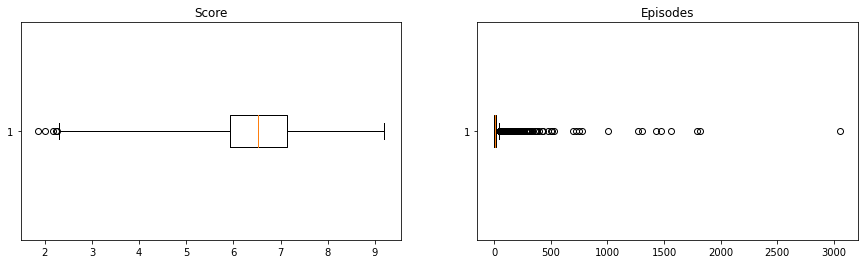

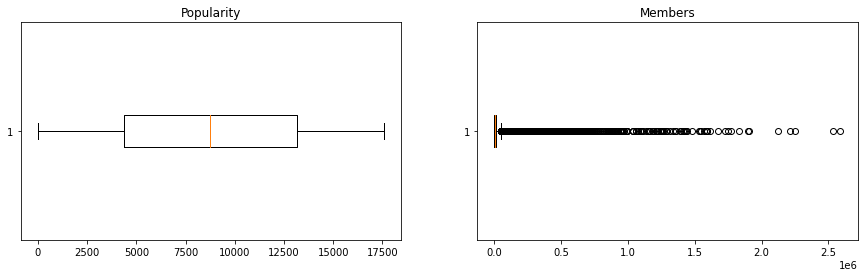

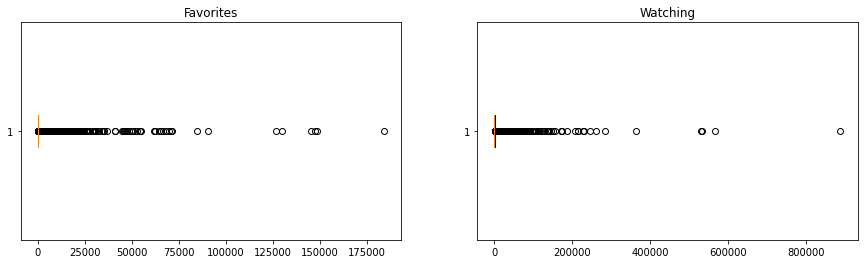

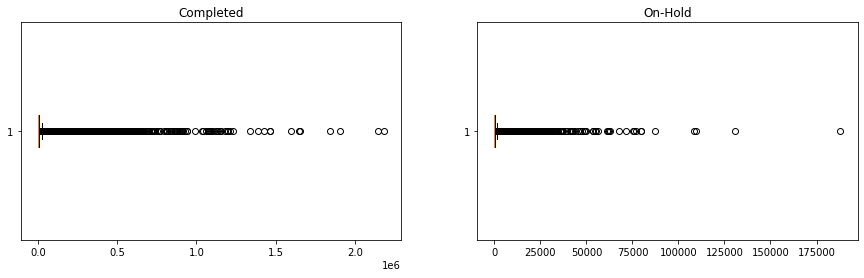

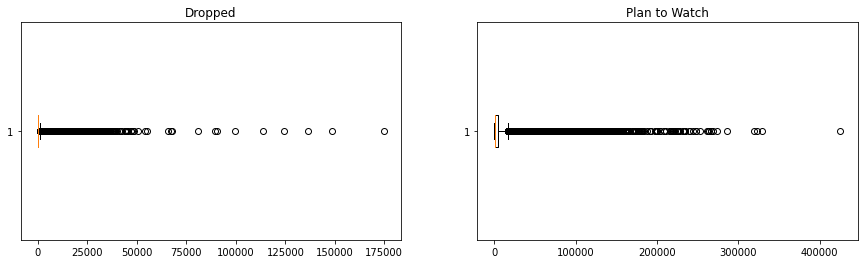

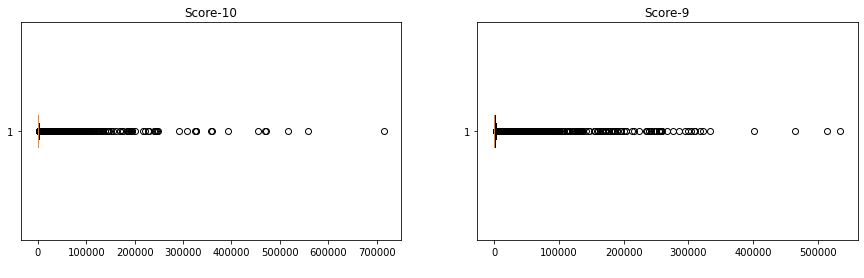

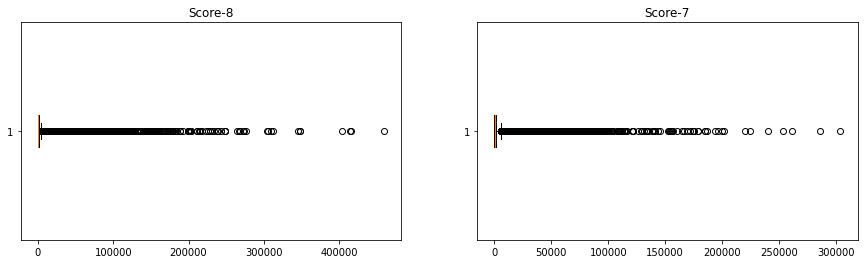

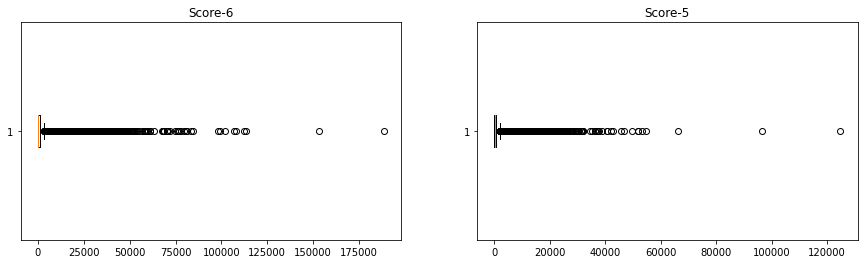

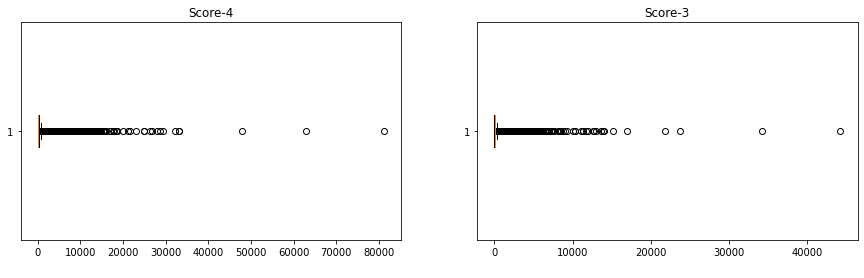

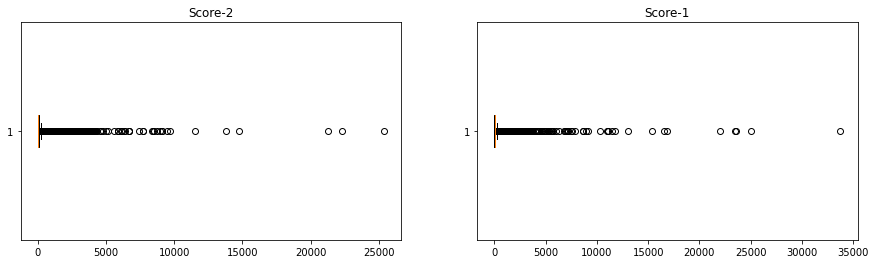

In [ ]:
for i in range(int((len(Cuantitativas.columns)-1)/2)):
  fig, (ax1, ax2) = plt.subplots(1,2)
  fig.set_figheight(4)
  fig.set_figwidth(15)
  ax1.boxplot(Cuantitativas[Cuantitativas.columns[i*2]][~Cuantitativas[Cuantitativas.columns[i*2]].isna()],
              vert =False, whis = 3)
  ax1.set_title(Cuantitativas.columns[i*2])
  ax1.set(xlabel = " ")
  ax2.boxplot(Cuantitativas[Cuantitativas.columns[i*2+1]][~Cuantitativas[Cuantitativas.columns[i*2+1]].isna()],
              vert =False, whis = 3)
  ax2.set_title(Cuantitativas.columns[i*2+1])
  ax2.set(xlabel = " ")

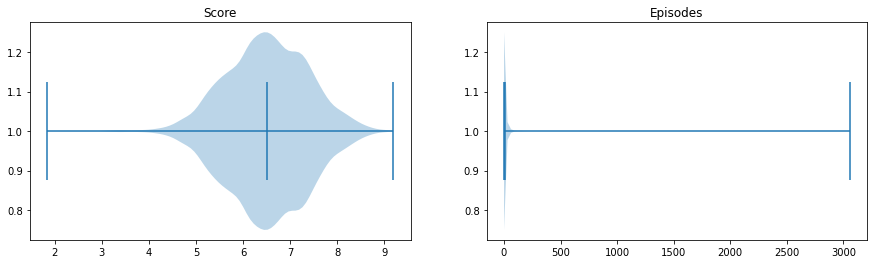

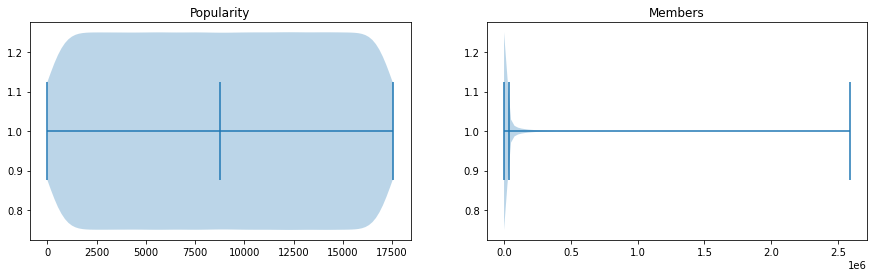

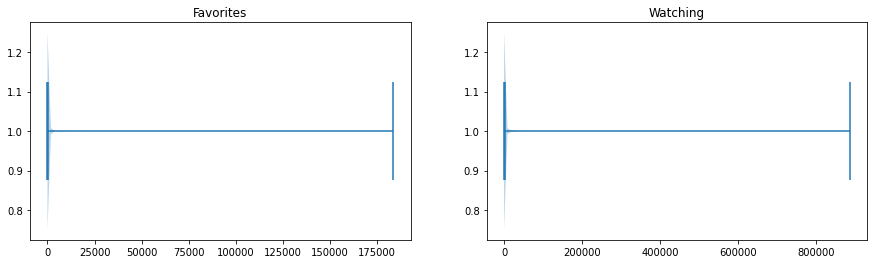

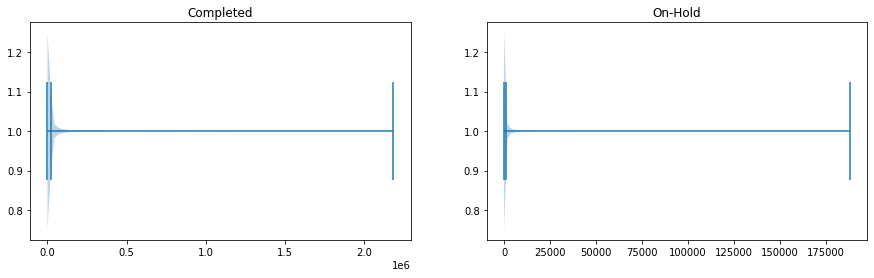

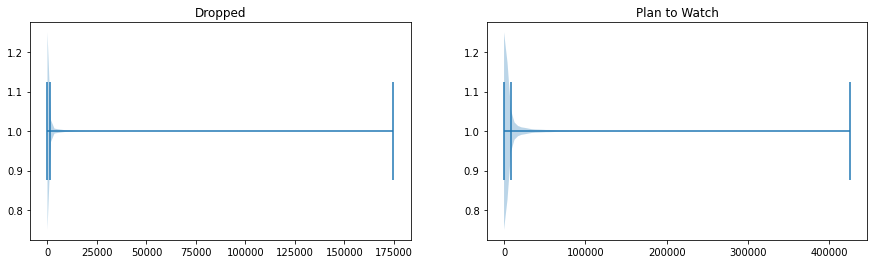

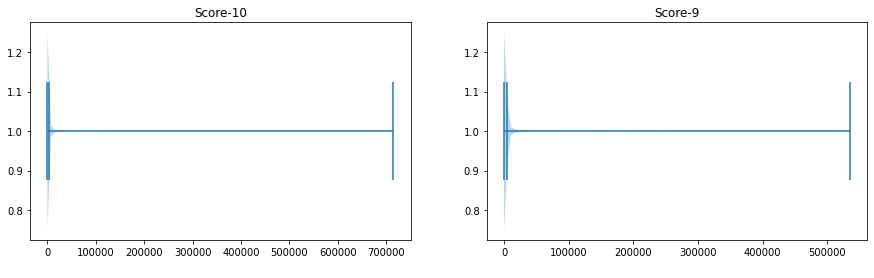

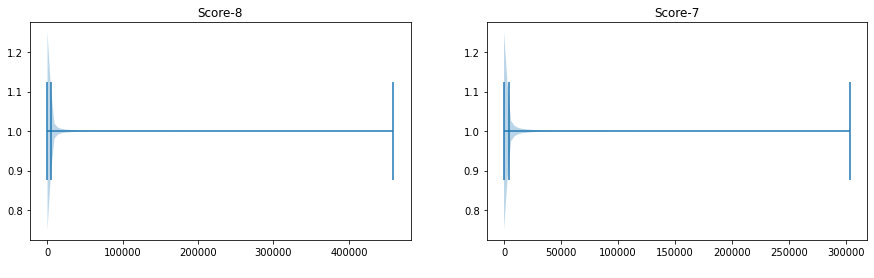

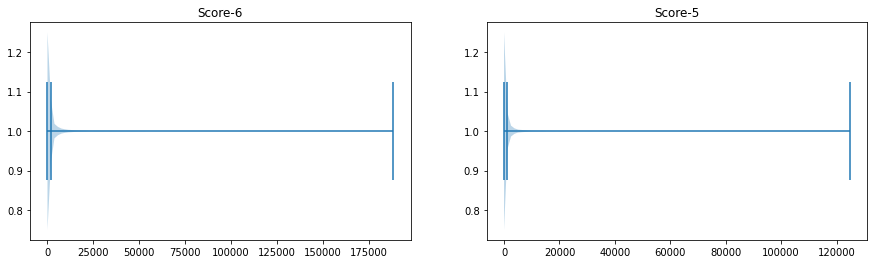

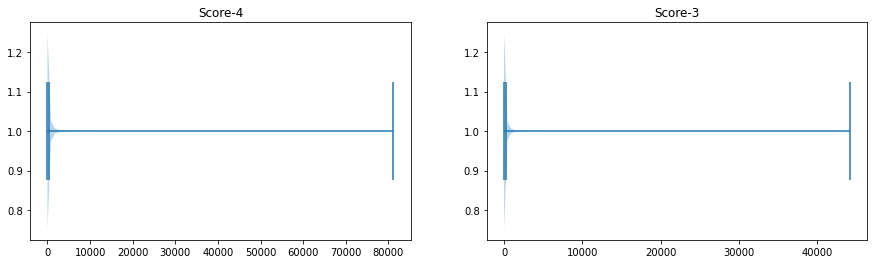

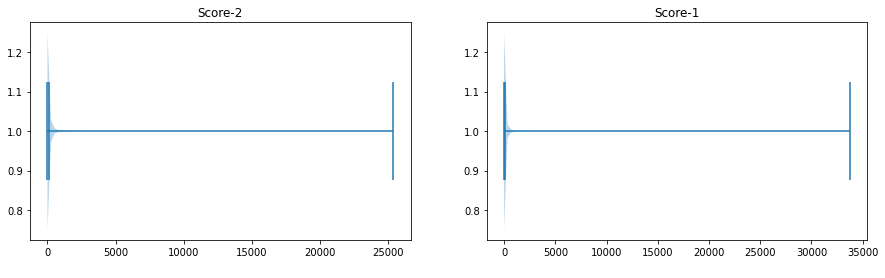

In [ ]:
for i in range(int((len(Cuantitativas.columns)-1)/2)):
  fig, (ax1, ax2) = plt.subplots(1,2)
  fig.set_figheight(4)
  fig.set_figwidth(15)
  ax1.violinplot(Cuantitativas[Cuantitativas.columns[i*2]][~Cuantitativas[Cuantitativas.columns[i*2]].isna()],
              vert =False, showmeans = True)
  ax1.set_title(Cuantitativas.columns[i*2])
  ax1.set(xlabel = " ")
  ax2.violinplot(Cuantitativas[Cuantitativas.columns[i*2+1]][~Cuantitativas[Cuantitativas.columns[i*2+1]].isna()],
              vert =False, showmeans =True)
  ax2.set_title(Cuantitativas.columns[i*2+1])
  ax2.set(xlabel = " ")

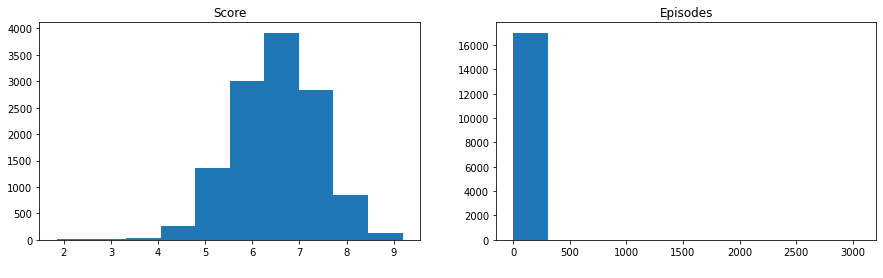

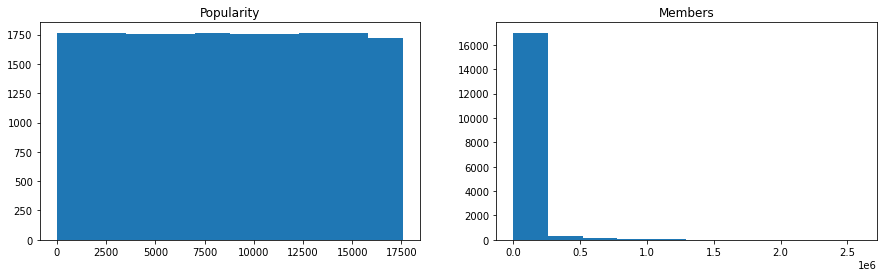

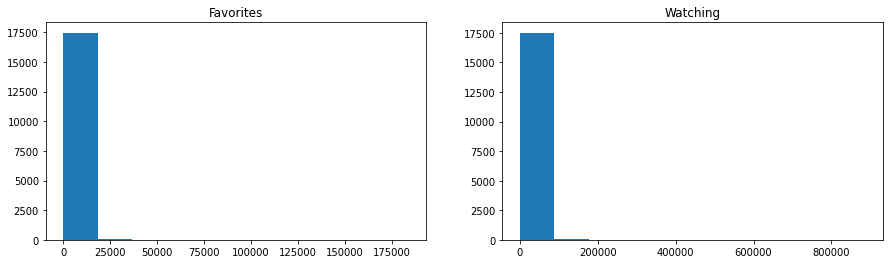

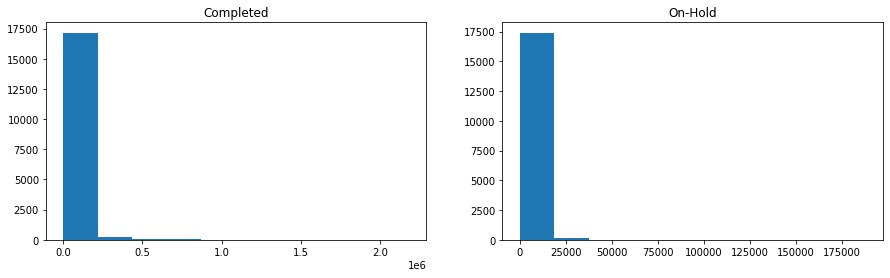

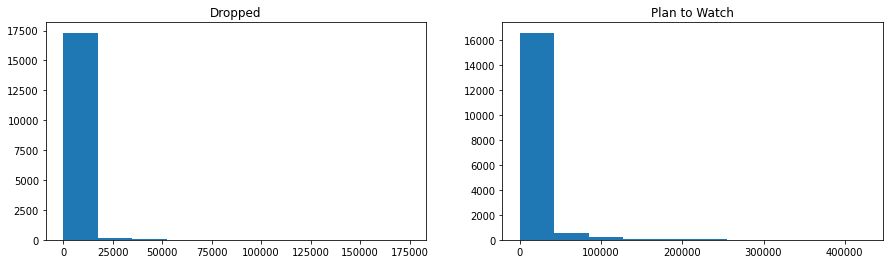

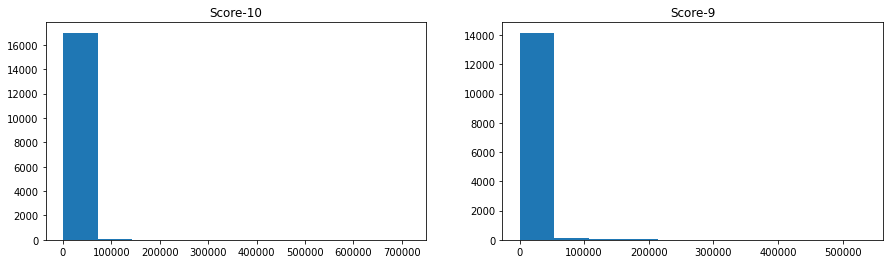

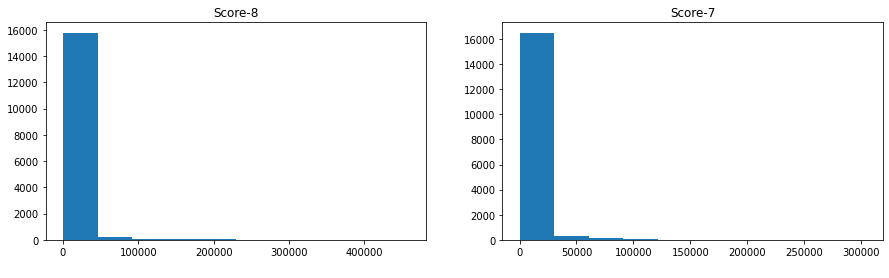

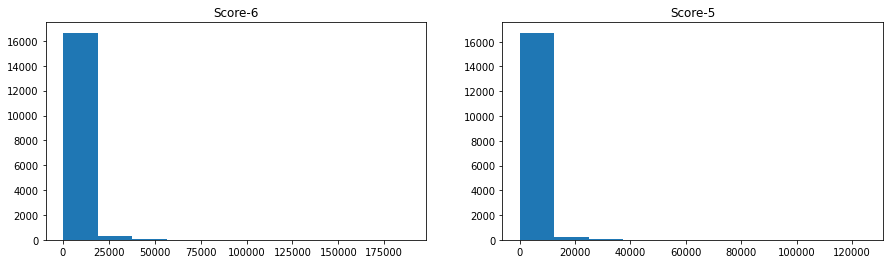

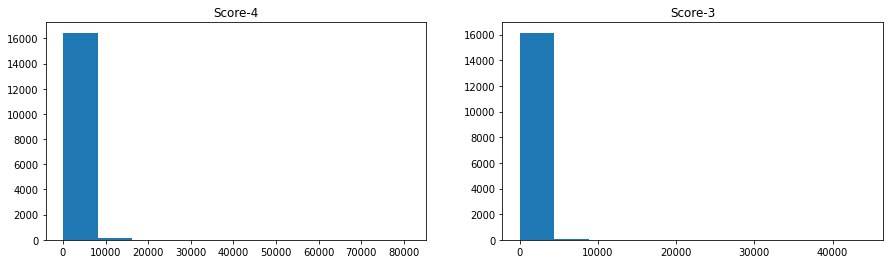

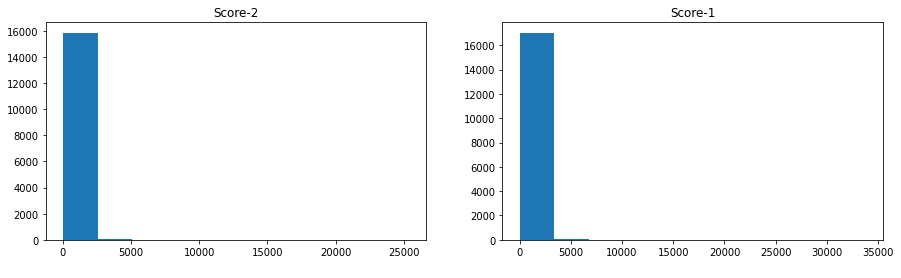

In [ ]:
for i in range(int((len(Cuantitativas.columns)-1)/2)):
  fig, (ax1, ax2) = plt.subplots(1,2)
  fig.set_figheight(4)
  fig.set_figwidth(15)
  ax1.hist(Cuantitativas[Cuantitativas.columns[i*2]][~Cuantitativas[Cuantitativas.columns[i*2]].isna()],
           bins = 10, histtype = 'stepfilled')
  ax1.set_title(Cuantitativas.columns[i*2])
  ax1.set(xlabel = " ")
  ax2.hist(Cuantitativas[Cuantitativas.columns[i*2+1]][~Cuantitativas[Cuantitativas.columns[i*2+1]].isna()],
           bins = 10, histtype = 'stepfilled')
  ax2.set_title(Cuantitativas.columns[i*2+1])
  ax2.set(xlabel = " ")

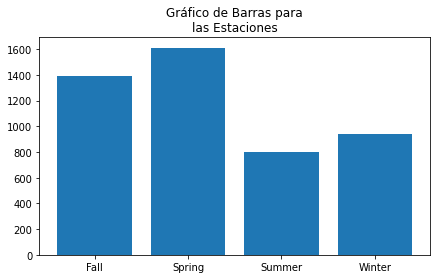

In [ ]:
Season = data_2[["Premiered Season"]][~data_2["Premiered Season"].isna()].groupby("Premiered Season").size()
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(7)
ax.bar(x = np.array(Season.keys()), height = np.array(Season.array))
ax.set_title("Gráfico de Barras para\nlas Estaciones")
plt.show()

## **Outliers**
Ahora utilizaremos la estandarización para identificar datos atípicos. Lo haremos principalmente basados en la variable respuesta que es **Score**.

In [ ]:
Score_Estandarizado = ((data[["Score"]]-np.mean(data[["Score"]]))/np.std(data[["Score"]]))[~data["Score"].isna()]
Indices = Score_Estandarizado.index[(np.abs(Score_Estandarizado)>=3)["Score"]]
data_2.loc[Indices,:][data_2.columns[0:20]]

,MAL_ID,Score,Type,Episodes,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7
387,413.0,2.23,OVA,1.0,Visual novel,19 min.,R - 17+ (violence & profanity),11058.0,2216.0,52059.0,278.0,643.0,41464.0,253.0,845.0,8854.0,2438.0,138.0,183.0,275.0
1215,1345.0,3.15,OVA,1.0,Novel,50 min.,R+ - Mild Nudity,11026.0,7587.0,3286.0,6.0,76.0,2008.0,29.0,94.0,1079.0,31.0,12.0,24.0,55.0
1441,1585.0,3.80,OVA,2.0,Game,24 min. per ep.,PG-13 - Teens 13 or older,11007.0,8921.0,1937.0,1.0,96.0,916.0,36.0,89.0,800.0,17.0,4.0,16.0,46.0
1649,1812.0,3.67,TV,12.0,Original,5 min. per ep.,PG-13 - Teens 13 or older,11020.0,7495.0,3442.0,19.0,135.0,1661.0,82.0,336.0,1228.0,53.0,16.0,29.0,76.0
2554,2776.0,3.35,OVA,1.0,Game,30 min.,PG-13 - Teens 13 or older,11043.0,8613.0,2194.0,5.0,82.0,973.0,39.0,76.0,1024.0,17.0,NaN,15.0,35.0
2570,2792.0,3.28,OVA,1.0,Game,27 min.,PG-13 - Teens 13 or older,11052.0,8428.0,2377.0,3.0,47.0,1514.0,26.0,48.0,742.0,25.0,9.0,15.0,37.0
2934,3287.0,1.85,OVA,1.0,Game,19 min.,PG-13 - Teens 13 or older,11049.0,3305.0,24550.0,75.0,441.0,18359.0,130.0,426.0,5194.0,760.0,53.0,33.0,63.0
3287,3801.0,3.81,Special,1.0,Other,1 hr. 34 min.,R - 17+ (violence & profanity),11018.0,7950.0,2863.0,3.0,52.0,1842.0,31.0,72.0,866.0,42.0,12.0,39.0,62.0
3696,4531.0,3.38,OVA,1.0,Manga,50 min.,R - 17+ (violence & profanity),11048.0,7471.0,3470.0,8.0,82.0,2138.0,48.0,91.0,1111.0,45.0,9.0,29.0,87.0
3971,5114.0,9.19,TV,64.0,Manga,24 min. per ep.,R - 17+ (violence & profanity),1.0,3.0,2248456.0,183914.0,171871.0,1644938.0,75728.0,32456.0,323463.0,714811.0,401507.0,199160.0,70045.0


Se encuentra que la gran mayoría de datos atípicos, son principalmente animes que tienen muy pocos capítulos y en cuanto a su popularidad, tiende a tener puestos muy bajos.

## **Valores Perdidos**

In [ ]:
scores = []
for i in range(len(data_2.columns)):
  if (len(re.findall("Score-", data_2.columns[i]))):
    scores.append(data_2.columns[i])

data_2[data_2["Score"].isna()][scores]

,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
1404,8.0,5.0,6.0,20.0,28.0,31.0,6.0,6.0,2.0,10.0
1504,7.0,2.0,6.0,13.0,17.0,22.0,15.0,12.0,7.0,10.0
1578,6.0,4.0,23.0,28.0,18.0,17.0,1.0,3.0,NaN,8.0
1699,3.0,1.0,2.0,9.0,5.0,9.0,3.0,1.0,2.0,3.0
1893,10.0,3.0,14.0,26.0,27.0,19.0,10.0,3.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...
17557,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
17558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17559,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Indices_1 = data_2[["Score"]][data_2["Score"].isna()].index
my_imputer = SimpleImputer(strategy = 'most_frequent')
Imputados = pd.DataFrame(my_imputer.fit_transform(data_2[data_2["Score"].isna()][scores]), columns = scores, index = Indices_1)
Estimado = []
for i in Indices_1:
  Estimado.append(np.array(Imputados.loc[i,:]).dot(np.array(list(range(1,11))))/sum(Imputados.loc[i,:]))
Imputados["Score"] = Estimado
for i in Imputados.columns:
  data_2.loc[Indices_1,i] = Imputados.loc[Indices_1,i]

data_2.loc[Indices_1,:]

,MAL_ID,Score,Type,Episodes,Source,Duration,Rating,Ranked,Popularity,Members,...,Studios foodunited.,Studios helo.inc,Studios iDRAGONS Creative Studio,Studios ixtl,Studios l-a-unch・BOX,Studios monofilmo,Studios pH Studio,Studios production doA,Studios teamKG,Studios ufotable
1404,1547.0,5.327869,TV,96.0,Manga,25 min. per ep.,G - All Ages,11270.0,11870.0,557.0,...,0,0,0,0,0,0,0,0,0,0
1504,1656.0,5.963964,TV,24.0,NaN,3 min. per ep.,G - All Ages,11598.0,12929.0,359.0,...,0,0,0,0,0,0,0,0,0,0
1578,1739.0,4.651376,TV,80.0,NaN,2 min. per ep.,G - All Ages,11947.0,11799.0,574.0,...,0,0,0,0,0,0,0,0,0,0
1699,1863.0,5.342105,TV,26.0,NaN,20 min. per ep.,NaN,12096.0,12286.0,473.0,...,0,0,0,0,0,0,0,0,0,0
1893,2073.0,4.735043,OVA,6.0,Manga,30 min. per ep.,R - 17+ (violence & profanity),14363.0,11317.0,693.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481.0,5.590909,ONA,NaN,Novel,NaN,NaN,NaN,13116.0,354.0,...,0,0,0,0,0,0,0,0,0,0
17558,48483.0,5.590909,TV,NaN,Manga,NaN,NaN,NaN,17562.0,7010.0,...,0,0,0,0,0,0,0,0,0,0
17559,48488.0,6.315789,TV,NaN,Visual novel,NaN,R - 17+ (violence & profanity),NaN,17558.0,11309.0,...,0,0,0,0,0,0,0,0,0,0
17560,48491.0,5.590909,TV,NaN,Manga,NaN,PG-13 - Teens 13 or older,NaN,17565.0,1386.0,...,0,0,0,0,0,0,0,0,0,0


## **Discretización y PCA**

Ahora realizaremos una discretización de la variable **Score** y haremos un **PCA** para los **Scores**.

In [ ]:
discretizacion = KBinsDiscretizer(n_bins = 4,strategy = "kmeans", encode = "ordinal")
Binarizadas = discretizacion.fit_transform(np.array(data_2["Score"]).reshape(len(data_2["Score"]),1))
data_2["Score-Discretizado"] = Binarizadas

data_2["Score-Discretizado"] = data_2["Score-Discretizado"].astype(str)
Variables_PCA =[]
for i in data_2.columns:
  if (len(re.findall("Score-",i))):
    Variables_PCA.append(i)

X = data_2[Variables_PCA].dropna()[Variables_PCA[0:(len(Variables_PCA)-1)]]
y = data_2[Variables_PCA].dropna()[Variables_PCA[-1]]
pca = PCA(n_components = 2)
ajustado = pca.fit_transform(X)

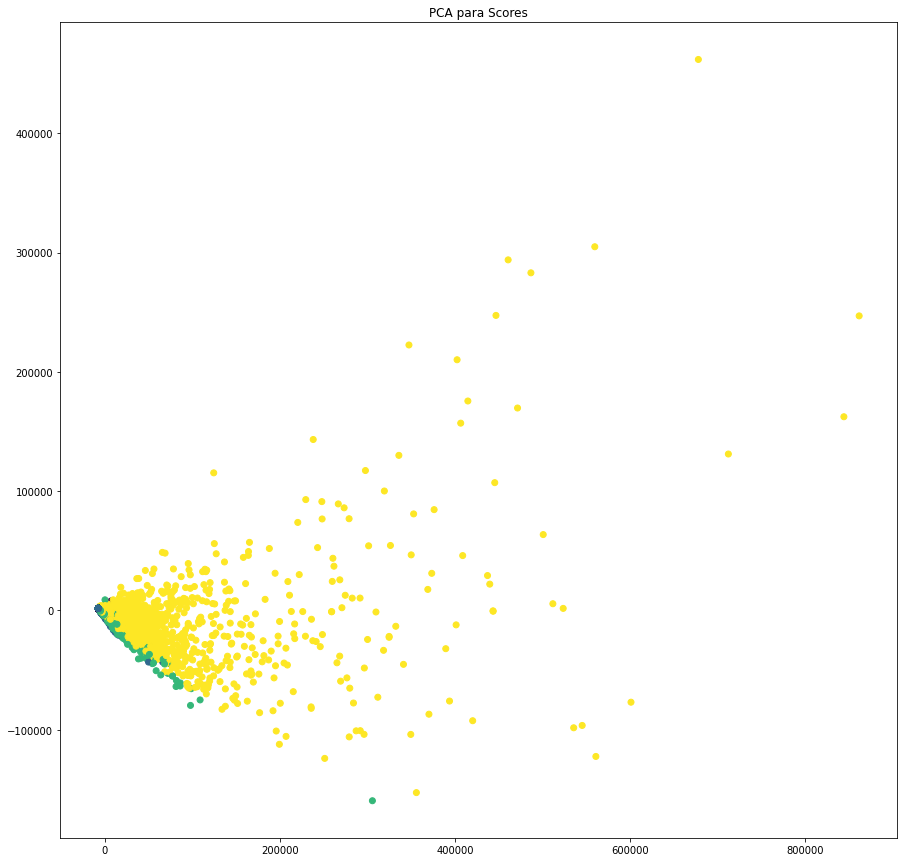

In [ ]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.scatter(ajustado.T[0], ajustado.T[1], c = y.astype(float))
plt.title("PCA para Scores")
plt.show()

In [ ]:
pca.fit(X).explained_variance_ratio_

array([0.88493274, 0.09187743])

In [ ]:
sum(pca.fit(X).explained_variance_ratio_)

0.9768101770972766

Se realizó un analisis de componentes principales para las variables Score-1 al Score-9, y los colores se definieron a partir de la discretización de la la variable Score, utilizando 4 intervalos por el medio de kmeans. Con las dos primeras componentes principales se alcanza a explicar un 97.6% de la variabilidad total.